# Challenge: Analyzing Text about Data Science

In this example, let's do a simple exercise that covers all steps of a traditional data science process. You do not have to write any code, you can just click on the cells below to execute them and observe the result. As a challenge, you are encouraged to try this code out with different data. 

## Goal

In this lesson, we have been discussing different concepts related to Data Science. Let's try to discover more related concepts by doing some **text mining**. We will start with a text about Data Science, extract keywords from it, and then try to visualize the result.

As a text, I will use the page on Data Science from Wikipedia:

In [42]:
# Basic web-request isn't working due to broken acceptance of wikipedia's robot policy >:(
# url = 'https://en.wikipedia.org/wiki/Data_science'

# Instead simpler `wikipedia` (pip) package will be used
url = "Data Science"

## Step 1: Getting the Data

First step in every data science process is getting the data. We will use `requests` library to do that:

In [43]:
import wikipedia

# The target language can be specified like this
# Note: some languages require specific fonts to be displayed properly
lang = 'ja'
wikipedia.set_lang(lang)

# Searching for the topic on wikipedia
results = wikipedia.search(url)

# and getting a page object of the fist result
first_page = wikipedia.page(results[0])

print(first_page)

<WikipediaPage 'データサイエンス'>


## Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest built-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the `HTMLParser` class and define the code that will collect all text inside HTML tags, except `<script>` and `<style>` tags.

In [44]:
# This part is relevant for raw web-requests using `requests` package
# from html.parser import HTMLParser

# class MyHTMLParser(HTMLParser):
#     script = False
#     res = ""
#     def handle_starttag(self, tag, attrs):
#         if tag.lower() in ["script","style"]:
#             self.script = True
#     def handle_endtag(self, tag):
#         if tag.lower() in ["script","style"]:
#             self.script = False
#     def handle_data(self, data):
#         if str.strip(data)=="" or self.script:
#             return
#         self.res += ' '+data.replace('[ edit ]','')

# parser = MyHTMLParser()
# parser.feed(text)
# text = parser.res

# For `wikipedia` package this is enough to retrieve the page's text
text = first_page.content
print(text[:1000])

データサイエンス（英: data science、略称: DS）またはデータ科学とは、データを用いて新たな科学的および社会に有益な知見を引き出そうとするアプローチのことであり、その中でデータを扱う手法である情報科学、統計学、アルゴリズムなどを横断的に扱う。


== 概要 ==
データサイエンスは、統計的、計算的、人間的視点から俯瞰することができる。それぞれの視点がデータサイエンスを構成する本質的な側面であり、これらの3つの視点の有機的結合こそがデータサイエンスという学問の神髄である（Blei and Smyth, 2017）。
これまでのデータ解析における現場の知識の重要性に対する認識不足が、データサイエンスという学問に対する幅広い誤解の源泉であると考えられる（Hernan, Hsu and Healy, 2018）。


== 手法・理論 ==
データサイエンスで使用される手法は多岐にわたり、分野として数学、統計学、計算機科学、情報工学、パターン認識、機械学習、データマイニング、データベース、可視化などと関係する。


== 実践・応用 ==
データサイエンスは、はっきりとした応用の文脈をもち、超領域性の様相を呈していて、また研究成果に対しては明確な社会的説明責任が求められ、さらに、研究成果の質的保証のためには従来の座学的基準以外に質のコントロールのための追加の基準が必要とされる。
データサイエンスの有効な推進のためには組織の異種混合性も重要である。これらの要件を満たす科学はギボンズらが主張するモード2科学の一種として認識することが出来る。
データサイエンスの研究者や実践者はデータサイエンティストと呼ばれる。
データサイエンスの応用としては、生物学、医学、工学、経済学、社会学、人文科学などが挙げられる。化学もそうである。


=== 所得の平等 ===
先進国でも発展途上国でも、データサイエンスのスキルに優れている国々では、所得の平等が高まっている。ドメイン全体での国の平均スキル能力と、国の上位10％が保有する収入の割合との間には負の相関関係がある。


== 歴史 ==
データサイエンスという用語は古くから使われていたが、特に1974年にピーター・ナウアが使用したことで注目を集めた。著書『Concise Survey of Computer Methods』に

## Step 3: Getting Insights

The most important step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library in case it is not present: 

In [45]:
# This will install the package into the environment it's been run in
import sys
!{sys.executable} -m pip install nlp_rake

The main functionality is available from `Rake` object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [61]:
# This package supports EU languages only. Other languages will be tokenized randomly
import nlp_rake

stopwords = []
with open('./japanese-stopwords', 'r') as file:
    for line in file:
        stopwords.append(line[:-1])

extractor = nlp_rake.Rake(
    min_chars=3,
    max_words=3,
    # min_freq=1,
    stopwords=stopwords
    )
# Note: the output is structured as (token, value)
res = extractor.apply(text)
res

[('hsu and healy', 9.0),
 ('「データサイエンスの基礎」、isbn 978-4-06-517000-7（2019年8月29日）。 椎名洋、姫野哲人、保科架風', 9.0),
 ('「データサイエンスのための数学」、isbn 978-4-06-516998-8（2019年8月29日）。 梅津佑太、西井龍映、上田勇祐', 9.0),
 ('taimre and r', 9.0),
 ('23-40 インクィジティブ・マインド：data science', 9.0),
 ('data science、略称', 4.0),
 ('2017）。 これまでのデータ解析における現場の知識の重要性に対する認識不足が、データサイエンスという学問に対する幅広い誤解の源泉であると考えられる（hernan',
  4.0),
 ('「スパース回帰分析とパターン認識」、isbn 978-4-06-518620-6', 4.0),
 ('第3巻、早稲田大学データ科学教育チーム：「データ科学入門iii：モデルの候補が複数あるときの意思決定」、isbn 978-4-7819-1598-2',
  4.0),
 ('第4巻、早稲田大学データ科学教育チーム：「データ科学入門iv：写像とグラフによる統一的体系化―変数/定数の観測可能性の視点から」isbn 978-4-7819-1629-3（2025年4月10日',
  4.0),
 ('「大規模データのマイニング」、共立出版、isbn 978-4-320-12375-5', 4.0),
 ('ギルバート・ストラング：「ストラング：線型代数とデータサイエンス」、近代科学社、isbn 978-4-7649-0600-6', 4.0),
 ('「データサイエンスと機械学習：理論からpythonによる実装まで」、東京化学同人、isbn 978-4-8079-2029-7', 4.0),
 ('牧野浩二、橋本洋志：「データサイエンス教本（第2版）」、オーム社、isbn 978-4-274-23114-8', 4.0),
 ('皆本晃弥：「pythonによる数理・データサイエンス・ai」、サイエンス社、isbn 978-4-7819-1585-2', 4.0),
 ('皆本晃弥：「スッキリわかる数理・データサイエンス・ai」、近代科学社、


We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as machine learning and big data, are present in the list at top positions.

## Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

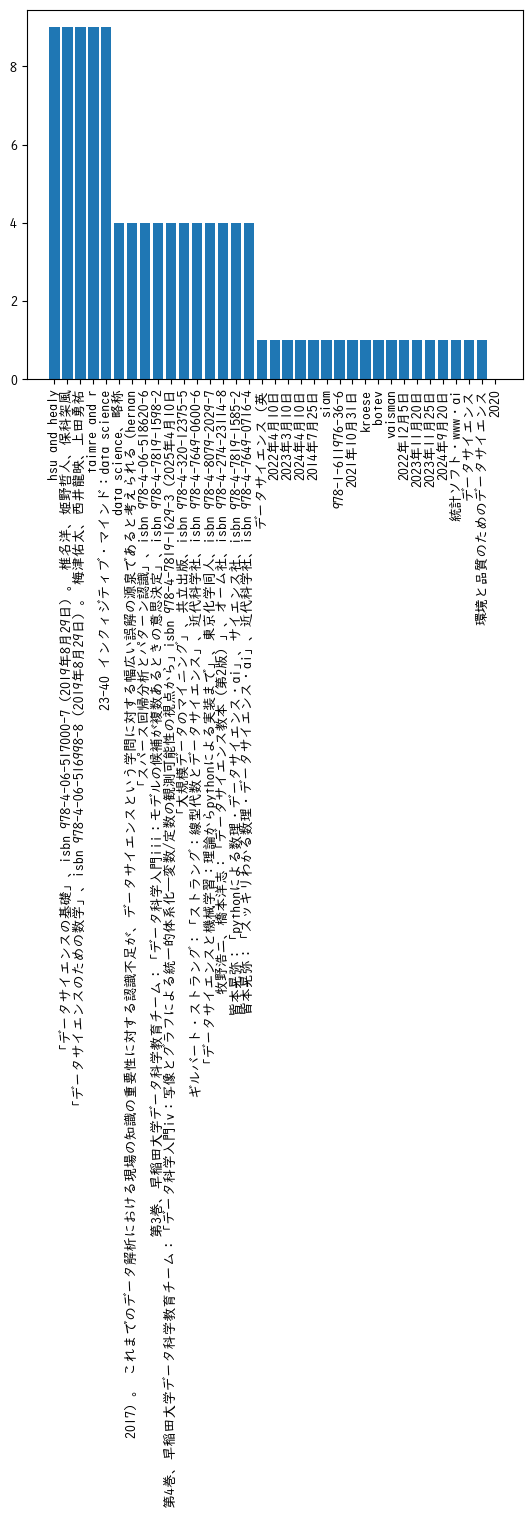

In [53]:
import matplotlib
# Note: Font must be available on the machine
matplotlib.rcParams['font.family'] = ['UD Digi Kyokasho N']

import matplotlib.pyplot as plt

def plot(pair_list):
    k, v = zip(*pair_list)
    plt.bar(range(len(k)), v)
    plt.xticks(range(len(k)), k, rotation='vertical')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.

In [ ]:
!{sys.executable} -m pip install wordcloud

`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns an image, which can then be displayed using `matplotlib`:

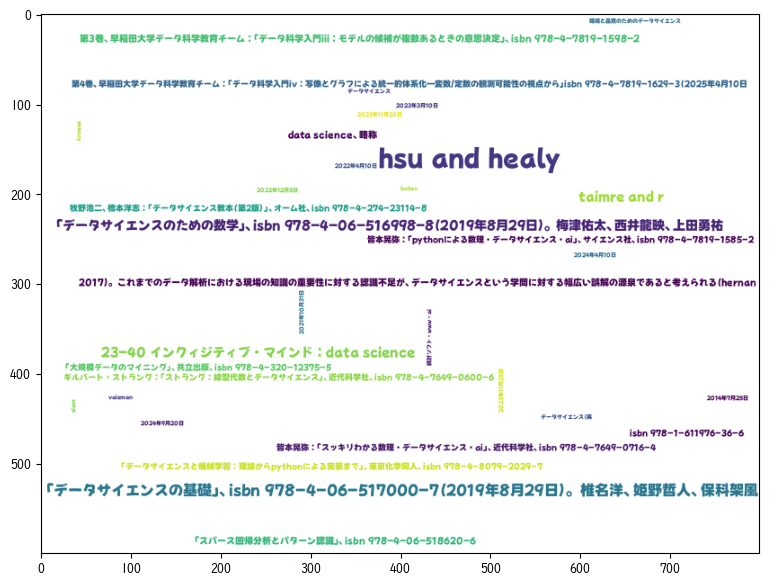

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Note: Font's path depends on OS *(Win=C:/Windows/Fonts, Linux=usr/local/share/fonts)
wc = WordCloud(background_color='white', width=800, height=600, font_path='C:/Users/Unknown_User/AppData/Local/Microsoft/Windows/Fonts/GenEiPOPle-Bk.ttf')
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate_from_frequencies({k:v for k, v in res}))

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:

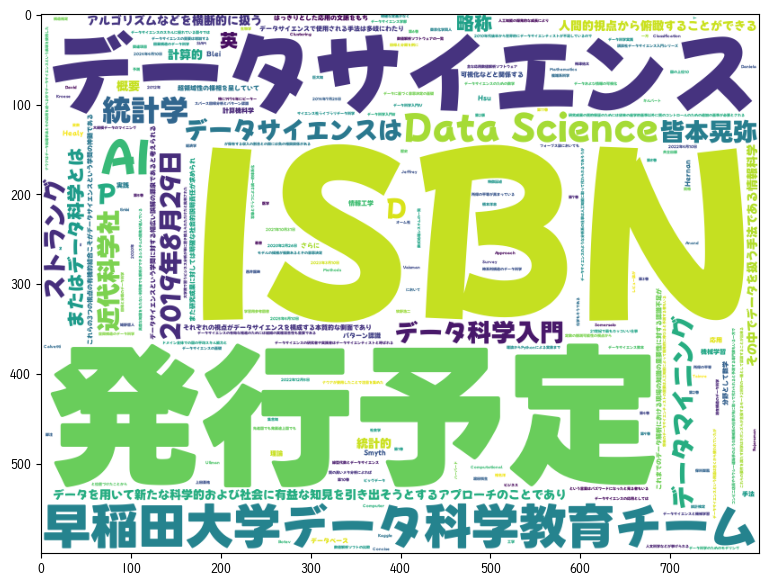

In [50]:
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate(text))

In [51]:
# WordCloud cannot create any (sub-)directories. The file will be saved into notebook's directory
wc.generate(text).to_file(f'ds_wordcloud_{lang}.png')

You can see that word cloud now looks more impressive, but it also contains a lot of noise (eg. unrelated words such as `Retrieved on`). Also, we get fewer keywords that consist of two words, such as *data scientist*, or *computer science*. This is because RAKE algorithm does much better job at selecting good keywords from text. This example illustrates the importance of data pre-processing and cleaning, because clear picture at the end will allow us to make better decisions.

In this exercise we have gone through a simple process of extracting some meaning from Wikipedia text, in the form of keywords and word cloud. This example is quite simple, but it demonstrates well all typical steps a data scientist will take when working with data, starting from data acquisition, up to visualization.

In our course we will discuss all those steps in detail. 